---
<h1><B> Assignment 2 </h1></B></center>
<h4><B> Deep Learning </h4></B></center>
<h4><B> (AI5100) </h4></B></center>


---

<table>
<tr>
</tr>
<tr>
<td><h3> Name : </td>
<td><h3> Raj Popat </td>
</tr>
<tr>
<td><h3> Roll Number : </td>
<td> <h3>CS23MTECH14009 </td>
</tr>
<table>

---

# `Initialization stuff`

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# activation functions

def Sigmoid(x):
  return 1/(1 + np.exp(-x))

def Tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def Relu(x):
  #return a vector for which each value in the vector is maximum of (0, xi) were xi is ith value of vector x
  return np.maximum(x, np.zeros(x.shape[0]))

def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

def softmax(x):
  return np.exp(x) / np.exp(x).sum()

def stable_softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum()

In [3]:
def ShowImage(img,CLR_BAR = False,gray = False,title="Image", vmin=None, vmax=None):

  plt.figure()
  if vmin!=None and vmin<0:
    img = (img - vmin) / (vmax - vmin)
  if gray:
    plt.imshow(img,cmap='gray', vmin=vmin, vmax=vmax)
  else:
    plt.imshow(img, vmin=vmin, vmax=vmax)
  if CLR_BAR:
    plt.colorbar()
  plt.title(title)
  plt.show()

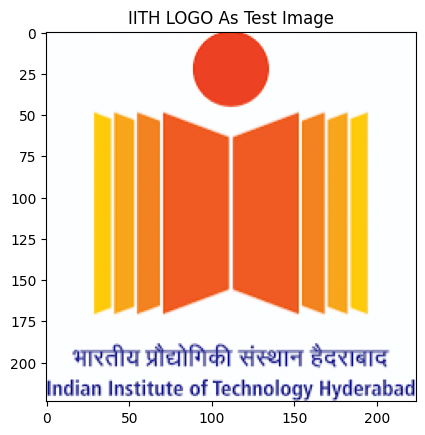

In [4]:
# Please check first that IITH_LOGO.png is downloaded
img = cv2.imread(r'IITH_LOGO.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # just swapping Color channels due to OpenCV
img = cv2.resize(img, (224, 224)) # just resizing image into 224 x 224
img = np.divide(img, [255,255,255]) # just normalizing
ShowImage(img,title="IITH LOGO As Test Image")

## Question

---

1. Convolution function: It accepts an image input, a filter kernel, stride, padding, and the non-
linear function. The function must convolve the input image (after padding if specified) with the kernel (at the specified stride size) and generate an output activation after applying the specified
non-linearity. Verify with the standard options for the non-linear activation functions - sigmoid,
tanh, ReLU, Leaky ReLU. Display the input image (e.g. a small image of the IITH logo), the filter
kernel, and the output activation map. Ensure that your function can accept multi-channel input
and a corresponding kernel volume. (5)



In [5]:
# Function to apply padding to an image
def padding(image, pad_size):
    print(image.shape)
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant')
    print(padded_image.shape)
    return padded_image

In [6]:
# Function for convolution operation
def convolution(image, kernel, stride, pad_size, activation):


    input_h, input_w, channels = image.shape

    # Apply padding if specified
    if pad_size:
        image = padding(image, pad_size)

    kernel_h, kernel_w, kernel_channels = kernel.shape
    output_h = ((input_h - kernel_h + 2 * pad_size) // stride) + 1
    output_w = ((input_w - kernel_w + 2 * pad_size) // stride) + 1
    #print(output_h,output_w,input_h,input_h)

    # Initialize output
    output = np.zeros((output_h, output_w))

    # Here We Iterate over output positions
    f=0
    for y in range(output_h):
        for x in range(output_w):
            # Extract image patch
            patch = image[y * stride: y * stride + kernel_h, x * stride: x * stride + kernel_w, :]
            output[y, x] = np.sum(patch[:, :, :] * kernel[:, :, :])

    # Apply activation function
    output = activation(output)
    return output

In [7]:
#image sharpning kernel
sharp_ker = np.array([[[0,0,0],[-1,-1,-1],[0,0,0]],
                    [[-1,-1,-1],[5,5,5],[-1,-1,-1]],
                    [[0,0,0],[-1,-1,-1],[0,0,0]]])

#image edge detection kernel
edge_ker = np.array([[[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]],
                    [[-1,-1,-1],[8,8,8],[-1,-1,-1]],
                    [[-1,-1,-1],[-1,-1,-1],[-1,-1,-1]]])

#image blurring kernel
blur_ker = np.array([[[1,1,1],[2,2,2],[1,1,1]],
                    [[2,2,2],[4,4,4],[1,1,1]],
                    [[1,1,1],[2,2,2],[1,1,1]]])

# horizontal edge detection
hor_ker = np.array([[[-1,-1,-1],[0,0,0],[1,1,1]],
                    [[-2,-2,-2],[0,0,0],[2,2,2]],
                    [[-3,-3,-3],[0,0,0],[3,3,3]]])

# random kernel
ran_ker = np.random.rand(3,3,3)

Image Shape "BEFORE CONVOLUTION"  (224, 224, 3)


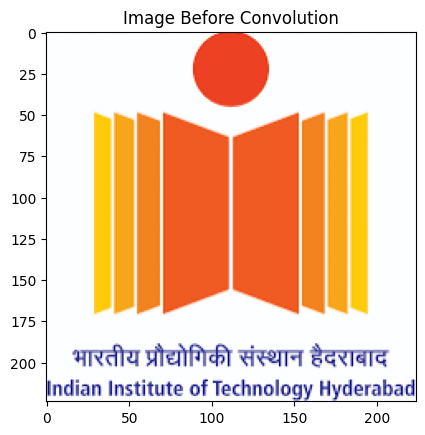

==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==

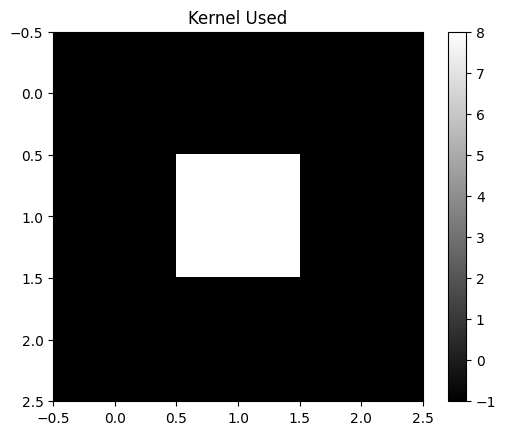

==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==

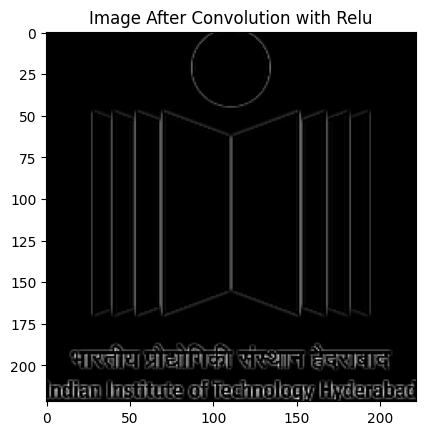

==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==

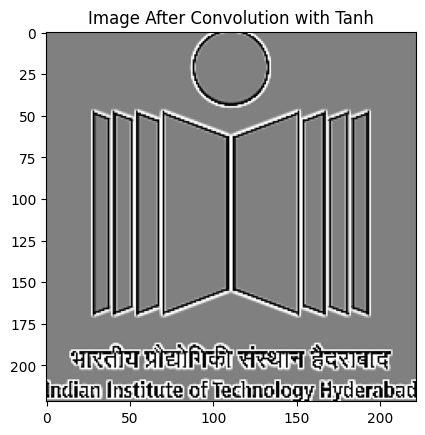

==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==

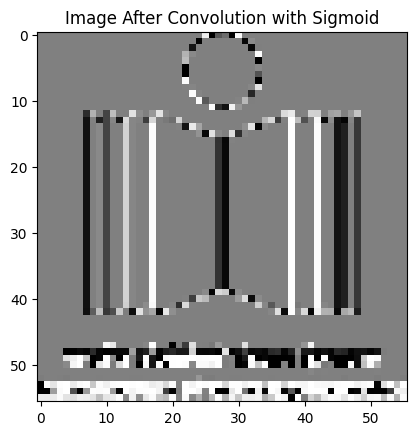

==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x==

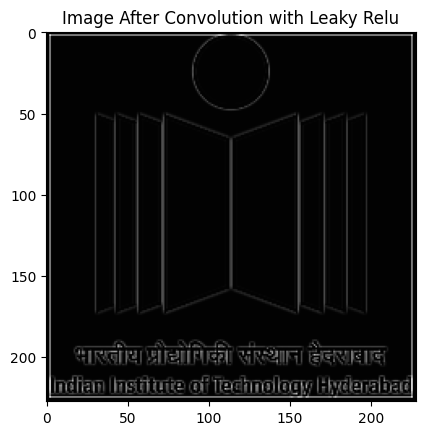

In [8]:
# Images for differnet test case with different kernels

print("Image Shape \"BEFORE CONVOLUTION\" ",img.shape)
ShowImage(img,title="Image Before Convolution")
print("==x=="*900,'\n')

# Viewing kernal
ShowImage(edge_ker,title="Kernel Used",CLR_BAR=True,gray=True,vmin=np.min(edge_ker), vmax=np.max(edge_ker))
print("==x=="*900,'\n')

# IITH Logo with edge detection kernel and activation Relu and stride 1 and padding 0
cnv_img = convolution(img,edge_ker,1,0,Relu)
print("Image Shape \"AFTER CONVOLUTION\"",cnv_img.shape)
ShowImage(cnv_img,gray=True,title="Image After Convolution with Relu")
print("==x=="*900,'\n')


# IITH Logo with edge detection kernel and activation Tanh and stride 1 and padding 0
cnv_img = convolution(img,edge_ker,1,0,Tanh)
print("Image Shape\"AFTER CONVOLUTION\" ",cnv_img.shape)
ShowImage(cnv_img,gray=True,title="Image After Convolution with Tanh")
print("==x=="*900,'\n')


# IITH Logo with edge detection kernel and activation Sigmoid and stride 4 and padding 0
cnv_img = convolution(img,edge_ker,4,0,Sigmoid)
print("Image Shape \"AFTER CONVOLUTION\" ",cnv_img.shape)
ShowImage(cnv_img,gray=True,title="Image After Convolution with Sigmoid")

# IITH Logo with edge detection kernel and activation leaky_relu and stride 1 and padding 3
print("==x=="*900,'\n')
cnv_img = convolution(img,edge_ker,1,3,leaky_relu)
print("Image Shape \"AFTER CONVOLUTION\" ",cnv_img.shape)
ShowImage(cnv_img,gray=True,title="Image After Convolution with Leaky Relu")

## Question

---

2. Pooling function: It accepts as input the activation map output from the convolution function,
a pooling function, and stride. The function must output the appropriately pooled activation map.
Display the input activation map and the pooled output. (2)



In [9]:
# pooling functions
def max_pool_opt(region):
  return np.max(region, axis=(0, 1))

def avg_pool_opt(region):
  return np.mean(region, axis=(0, 1))

def global_avg_opt(input_volume):
  return np.mean(input_volume, axis=(2))  # Flatten across spatial dimensions

In [10]:
# Function for pooling operation
def pooling(activation_map,stride,pool_opt = max_pool_opt):

    # Get input dimensions
    input_h, input_w = activation_map.shape

    # Define pool size based on stride
    pool_size = stride

    # Define output dimensions
    output_h = int(input_h / stride)
    output_w = int(input_w / stride)

    # Initialize output
    output = np.zeros((output_h, output_w), dtype="float64")

    # Iterate over output positions
    for y in range(output_h):
        for x in range(output_w):
            # Extract region for pooling
            region = activation_map[y * stride: y * stride + pool_size, x * stride: x * stride + pool_size]
            output[y, x] = pool_opt(region)
    return output

Image Shape "AFTER POOLING"  (76, 76)


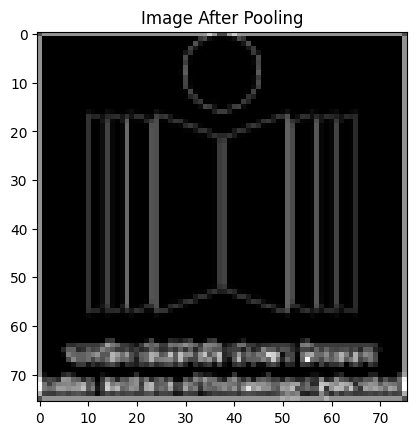

In [11]:
pool_img = pooling(cnv_img,3,avg_pool_opt)
print("Image Shape \"AFTER POOLING\" ",pool_img.shape)
ShowImage(pool_img,gray=True,title="Image After Pooling")

## Question

---

3. Convolution layer function: It accepts as input a volume (image or activation maps), number
of filters, kernel dimensions, stride, padding, and the non-linear activation function. The function
must convolve the input volume (after padding if specified) with each kernel (at the specified stride
size) and generate an output activation volume after applying the specified non-linearity. Display
the input image or activation maps, the filter kernels, and the output activation maps. Verify that
the output of this function does indeed have the expected size (W × H × C) as discussed in class.
(3)



In [12]:
# Function for convolution layer (multiple filters)
def convolution_layer(input_data, kernel, kernel_size,stride, padding, activation):

    num_filters = kernel_size[0]

    # Define output volume dimensions
    output_h = int((input_data.shape[0] - kernel_size[1] + 2 * padding) / stride) + 1
    output_w = int((input_data.shape[1] - kernel_size[2] + 2 * padding) / stride) + 1

    if kernel_size[3]!=input_data.shape[2]:
      #print(kernel_size,input_data.shape)
      print("Depth of the kernel is not same as depth of the image.")
      return None

    # Initialize output volume
    output_volume = np.zeros((output_h, output_w, num_filters))

    # Generate and apply filters
    for filter_idx in range(num_filters):
        output_volume[:, :, filter_idx] = convolution(input_data, kernel[filter_idx], stride, padding, activation)
    return output_volume

Printing new kernel shape (2, 3, 3, 3)
Printing shape of image before convolution (224, 224, 3)
Printing shape of output after convolution (222, 222, 2)


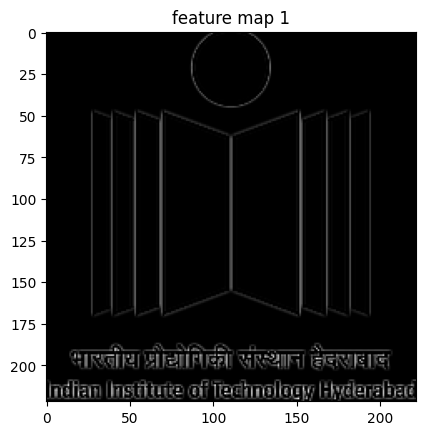

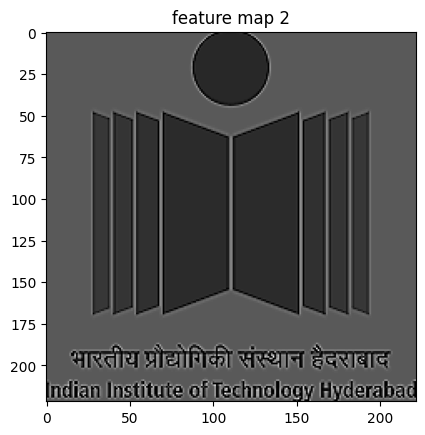

In [13]:
new_ker = np.array([edge_ker,sharp_ker])
print( "Printing new kernel shape",new_ker.shape)
print( "Printing shape of image before convolution",img.shape)
cov_img = convolution_layer(img,new_ker,new_ker.shape,1,0,Relu)
print( "Printing shape of output after convolution",cov_img.shape)
for i in range(new_ker.shape[0]):
  ShowImage(cov_img[:,:,i],gray=True,title="feature map "+str(i+1))

## Question

---

4. Pooling layer function: It accepts as input the activation map volume, the pooling function,
stride, and generates a pooled output volume. A special case for performing Global Average Pooling
should also be provided. (2)



In [14]:
# Function for pooling layer (multiple filters)
def pooling_layer(input_volume, stride,pool_opt):

    # Define output volume dimensions
    output_h = input_volume.shape[0]//stride
    output_w = input_volume.shape[1]//stride
    num_channels = input_volume.shape[2]

    # Special case for Global Average Pooling
    if pool_opt == global_avg_opt:
        output_volume = global_avg_opt(input_volume)  # Flatten across spatial dimensions
        #ShowImage(output_volume,gray=True)
        return output_volume

    # Initialize output volume
    output_volume = np.zeros((output_h, output_w,num_channels))

    # Apply pooling to each feature map
    for i in range(input_volume.shape[-1]):
        output_volume[:, :, i] = pooling(input_volume[:, :, i],stride,pool_opt)
        #ShowImage(output_volume[:, :, i],gray=True)


    return output_volume

Printing shape before pooling (222, 222, 2)
Printing shape after global avgerage pooling (222, 222)


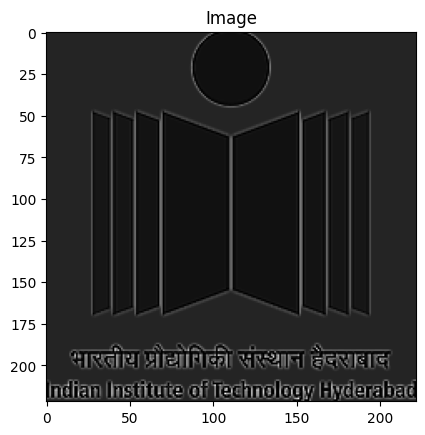

In [15]:
print("Printing shape before pooling",cov_img.shape)
pool_img = pooling_layer(cov_img,4,global_avg_opt)
print("Printing shape after global avgerage pooling",pool_img.shape)
ShowImage(pool_img,gray=True)

## Question

---

5. Multilayer Perceptron (MLP) function: It accepts as input a vector, the number of hidden
layers, the size of each hidden layer, the non-linear function, and the size of the output layer. This
function should generate an output vector of the specified size. Generate the output with and
without the softmax function applied to the output layer. (3)


In [16]:
# Function for Multilayer Perceptron (MLP)
def mlp(input_vector, num_hidden_layers, hidden_layer_sizes, activation, output_size, apply_softmax=True):

    # Initialize layers
    layers = []
    current_layer_size = len(input_vector)
    for i in range(num_hidden_layers):
        layers.append(np.random.rand(current_layer_size, hidden_layer_sizes[i]))  # Initialize weights
        layers.append(activation)  # Add activation function
        current_layer_size = hidden_layer_sizes[i]

    # Output layer
    layers.append(np.random.rand(current_layer_size, output_size))

    # Forward propagation
    output = input_vector
    for i in range(0, len(layers), 2):  # Iterate through weights and activations
        output = np.dot(output, layers[i])
        if i + 1 < len(layers):
            output = activation(output)  # Apply activation

    # Apply softmax if specified
    if apply_softmax:
        #output = np.exp(output) / np.sum(np.exp(output), axis=1, keepdims=True)
        #print(output)
        output = stable_softmax(output)

    #print(output)
    return output

In [17]:
# agrguments for mlp is input vector, num of hidden layers, hidden layers sizes, activation, output size, false flag for softmax if wanted
output = mlp(pool_img.flatten(),7,(1,2,3,4,5,6,7),Sigmoid,5)
print("Generate the output with and without the softmax function applied to the output layer.")
print(" ")
print("with softmax")
print("Printing output shape",output.shape)
print("Printing output ",output)

print("")
print("Without softmax")
output = mlp(pool_img.flatten(),7,(1,2,3,4,5,6,7),Sigmoid,5,False)
print("Printing output shape",output.shape)
print("Printing output ",output)

Generate the output with and without the softmax function applied to the output layer.
 
with softmax
Printing output shape (5,)
Printing output  [0.1310058  0.06235414 0.23121674 0.11785297 0.45757035]

Without softmax
Printing output shape (5,)
Printing output  [3.42932713 2.11687781 2.60949678 3.51394542 4.23119415]


## Question

---

6. Putting-it all together: Finally, use the functions you have written to implement a CNN with the
following architecture. The CNN must accept an image input and output a vector of appropriate
dimension. In other words, the function must effectively implement the feed-forward path in a
CNN. (5)
• Input image of size 224×224×3. Use validation images (or, random crops) from the ILSVRC
dataset.
• Convolution layer with 16 kernels of size 5 × 5 spatial dimensions and ReLU activation.
• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
• Convolution layer with 32 kernels of spatial size 3 × 3 and sigmoid activation.
• Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
• A Global Average Pooling (GAP) layer.
• An MLP with one hidden layer (size same as input) that accepts as input the previous layer’s
output and maps it to 1000 output nodes. Use ReLU activation for the MLP (softmax in the
o/p layer).
Verify that your composition of function accepts and image input and outputs a vector.


# `I am Using this image from from the ILSVRC dataset.`


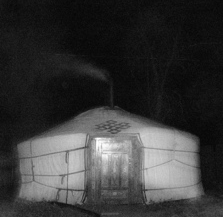


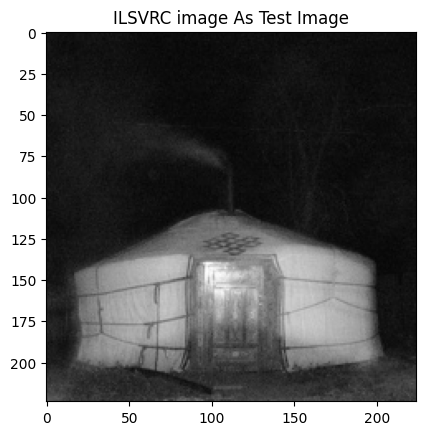

Printing kernal shape  (16, 5, 5, 3)
Printing shape after convolution 1  (220, 220, 16)
Printing shape after pooling layer  (110, 110, 16)
Printing shape after convolution 2 (108, 108, 32)
Printing shape after pooling layer  (54, 54, 32)
Showing image after gap and shape (54, 54)


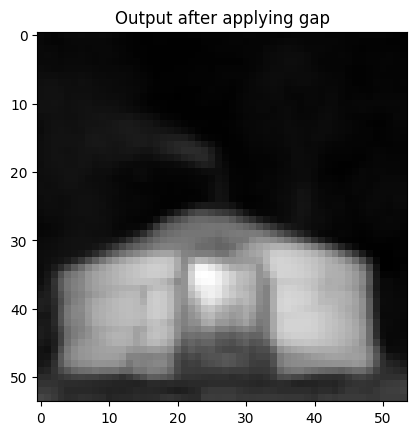

Output vector shape: (1000,)


In [18]:
def cnn_forward_pass(image):
    # Input image (assuming RGB with validation size)
    input_image = image
    kernel = np.random.rand(16,5,5,input_image.shape[2])

    print("Printing kernal shape ",kernel.shape)
    # Convolution layer 1
    conv1 = convolution_layer(input_image,kernel,kernel.shape, 1, 0, Relu)

    print("Printing shape after convolution 1 ",conv1.shape)

    # Max pooling layer 1
    pool1 = pooling_layer(conv1, 2, max_pool_opt)
    print("Printing shape after pooling layer ",pool1.shape)
    kernel = np.random.rand(32,3,3,pool1.shape[2])

    # Convolution layer 2
    conv2 = convolution_layer(pool1,kernel,kernel.shape, 1, 0, Relu)
    print("Printing shape after convolution 2",conv2.shape)

    # Max pooling layer 2
    pool2 = pooling_layer(conv2, 2,max_pool_opt)
    print("Printing shape after pooling layer ",pool2.shape)

    # Global Average Pooling
    gap = pooling_layer(pool2,1,global_avg_opt)

    print("Showing image after gap and shape", gap.shape)
    ShowImage(gap,gray=True,title="Output after applying gap")

    # MLP
    mlp_output = mlp(gap.flatten(), 1,(len(gap.flatten()),),Relu, 1000)

    return mlp_output

# Please check first that IITH_LOGO.png is downloaded
img = cv2.imread(r'ILSVRC_image.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # just swapping Color channels due to OpenCV
img = cv2.resize(img, (224, 224)) # just resizing image into 224 x 224
img = np.divide(img, [255,255,255]) # just normalizing
ShowImage(img,title="ILSVRC image As Test Image")

# Example usage
output_vector = cnn_forward_pass(img)  # Replace with your input image
print(f"Output vector shape: {output_vector.shape}")


## Question

---

7. The adding problem: In this task, each data sample consists of a sequence of variable length, but a constant depth (size of feature vector at each time instance) of 2. All values of the first di-
mension (randomly) lie in [0, 1], and the second dimension is all zeros except for two elements that are marked by 1. The objective of the task is to sum the random values whose second dimensions
are marked by 1. Train the different RNNs (Elmon network, LSTM, and GRU) discussed in the
class and compare their performance against a baseline that always predicts a sum of 1 plotting
the learning curves and final performance. Note that you are expected to implement these models
(as opposed to using the built-in constructs).[3 (Elmon) + 7 (LSTM) + 4 (GRU)+ 6 (Dataset &
baseline & comparison) = 20]
The following table presents two data samples (x) along with their labels (y). Note that the
samples should be of different lengths (n), so the dimensions of each sample can be represented as
n × 2. Given examples have lengths of 5 and 8 respectively. You have to generate/create a big
dataset (≥ 5000) of such samples for training and testing of the RNNs.

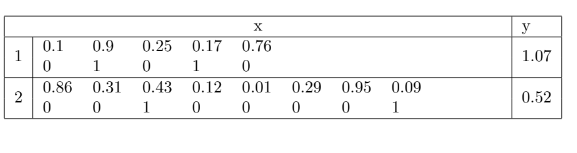


# ` Importing Required Liberaries`

In [19]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
np.random.seed(14009)
torch.manual_seed(14009)

# ` Created a Functions for data generation`

In [20]:
# generate Lists of Input x and y
def gen_X_Y(size_input,start,max_size_x,total_ones):

  X = []
  Y = []
  #check total number of ones should be less then size
  if total_ones > max_size_x - start:
    print("Invalide Inputs")
    total_ones = max_size_x

  for i in range(size_input):
    x,y = gen_x_y(start,max_size_x,total_ones)
    X.append(x)
    Y.append(y)

  X = np.array(X,dtype=object)
  Y = np.array(Y)
  return X,Y

# generating x and y
def gen_x_y(start,max_size,total_ones):

  x_len = np.random.randint(start,start + max_size)
  x1 = np.random.random(x_len)
  x2 = np.zeros(x_len)
  y=0
  ones_positions = np.random.choice(x_len, size=total_ones, replace=False)
  for i in ones_positions:
    x2[i]=1
    y = y+x1[i]
  return torch.from_numpy(np.array(list(zip(x1,x2)))) , torch.from_numpy(np.array([y]))

# `Here we can generate required data by changing values`

In [21]:
size_input = 5001                                        # Size of the Input
start = 2                                                # Minimum size of x
max_size_x = 7                                           # Possible length of x
total_ones = 2                                           # Total elements that are marked by 1.
X,Y = gen_X_Y(size_input,start,max_size_x,total_ones)

print("Printing Shape of the data ",X.shape,Y.shape)

# Test Train split of 30-70
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

Printing Shape of the data  (5001,) (5001, 1)


# `Here are equations for Forward Propagation ERNN which I have used,these are mentioned in Sir's PPT `

> Indented block
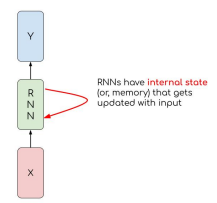 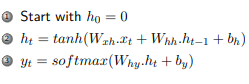 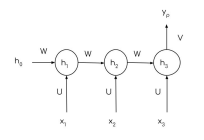


In [22]:
class Elman_RNN(nn.Module):
    def __init__(self, Input_S, hidden_s, output_size):
      super().__init__()
      self.Whx = nn.Linear(Input_S, hidden_s  , bias=False )
      self.Whh = nn.Linear(hidden_s, hidden_s)
      self.Why = nn.Linear(hidden_s, output_size)
      self.double()

    def forward(self, INP, Hidden_State):

      Ux = self.Whx(INP)          # dot product of xt and Transpose(Whx)
      Wh = self.Whh(Hidden_State) # dot product of ht and Transpose(Whh)
      Ht = torch.tanh(Ux + Wh)    # here in the calculation of Ux and Wh bias are included due to nn.linear
      yt = self.Why(Ht)           # calculating output y at time t here we are not applying softmax because we are doing regression not classification
      return yt, Ht

# `LSTM`
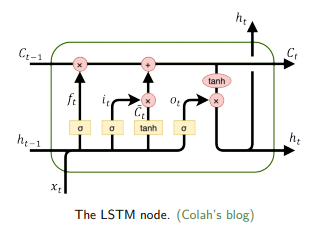
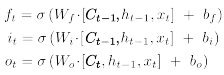
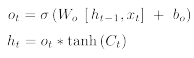
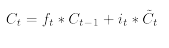

In [23]:
# Implementation of LSTM
class LSTM(nn.Module):
    def __init__(self, Input_S, Hidden_S, Output_S):
        super().__init__()
        self.Ui = nn.Linear(Input_S, Hidden_S  , bias=False )
        self.Uf = nn.Linear(Input_S, Hidden_S  , bias=False )
        self.Uo = nn.Linear(Input_S, Hidden_S  , bias=False )

        self.Wi = nn.Linear(Hidden_S, Hidden_S)
        self.Wo = nn.Linear(Hidden_S, Hidden_S)
        self.Wf = nn.Linear(Hidden_S, Hidden_S)

        self.Uc = nn.Linear(Input_S, Hidden_S)
        self.Wc = nn.Linear(Hidden_S, Hidden_S)
        self.V = nn.Linear(Hidden_S, Output_S)
        self.double()

    def forward(self, INP, Hidden_State, CELL_State):
        uf = self.Uf(INP)
        wf = self.Wf(Hidden_State)
        Ft = torch.sigmoid(uf + wf)
        ui = self.Ui(INP)
        wi = self.Wi(Hidden_State)
        It = torch.sigmoid(ui + wi)
        uo = self.Uo(INP)
        wo = self.Wo(Hidden_State)
        Ot = torch.sigmoid(uo + wo)
        uc = self.Uc(INP)
        CTt = torch.sigmoid(uc)
        Ct = (Ft * CELL_State) + ( It * CTt)
        Ht = Ot * torch.sigmoid(Ct)
        yt = self.V(Ht)
        return yt, Ht, Ct

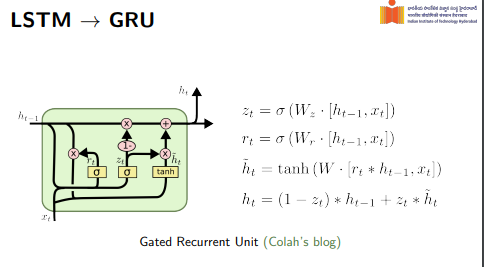

In [24]:
# Implementation of GRU
class GRU(nn.Module):
    def __init__(self, Input_S, Hidden_S, Output_S):
        super().__init__()

        self.Uz = nn.Linear(Input_S, Hidden_S  , bias=False )
        self.Wz = nn.Linear(Hidden_S, Hidden_S)
        self.Ur = nn.Linear(Input_S, Hidden_S  , bias=False )
        self.Wr = nn.Linear(Hidden_S, Hidden_S)
        self.Uh = nn.Linear(Input_S, Hidden_S  , bias=False)
        self.Wh = nn.Linear(Hidden_S, Hidden_S , bias=False )
        self.V = nn.Linear(Hidden_S, Output_S)

        self.double()

    def forward(self, INP, Hidden_State):
        uz = self.Uz(INP)
        wz = self.Wz(Hidden_State)
        Zt = torch.sigmoid(uz + wz)
        ur = self.Ur(INP)
        wr = self.Wr(Hidden_State)
        Rt = torch.sigmoid(ur + wr)
        uh = self.Uh(INP)
        wh = self.Wh(Rt * Hidden_State)
        Ht_hat = torch.tanh(uh + wh)
        Ht = ((1 - Zt) * Hidden_State) + (Zt * Ht_hat)
        yt = self.V(Ht)
        return yt, Ht

# ` Here I have defined Max epochs , Input layer size, Hidden layer size , Output layer size for all theree ERNN, LSTM and GRU`

In [25]:
# Initializing Parameters for all 3 algo
MAX_EPOCH = 40
Input_S  = 2
Hidden_S  = 14
Output_S  = 1
L      = 0.005
Model1 = Elman_RNN(Input_S, Hidden_S, Output_S)
Model2 = LSTM(Input_S, Hidden_S, Output_S)
Model3 = GRU(Input_S, Hidden_S, Output_S)
print("==x=="*20,"\n",Model1,"\n","==x=="*20,"\n",Model2,"==x=="*20,"\n",Model3,"==x=="*20)

==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x== 
 Elman_RNN(
  (Whx): Linear(in_features=2, out_features=14, bias=False)
  (Whh): Linear(in_features=14, out_features=14, bias=True)
  (Why): Linear(in_features=14, out_features=1, bias=True)
) 
 ==x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x====x== 
 LSTM(
  (Ui): Linear(in_features=2, out_features=14, bias=False)
  (Uf): Linear(in_features=2, out_features=14, bias=False)
  (Uo): Linear(in_features=2, out_features=14, bias=False)
  (Wi): Linear(in_features=14, out_features=14, bias=True)
  (Wo): Linear(in_features=14, out_features=14, bias=True)
  (Wf): Linear(in_features=14, out_features=14, bias=True)
  (Uc): Linear(in_features=2, out_features=14, bias=True)
  (Wc): Linear(in_features=14, out_features=14, bias=True)
  (V): Linear(in_features=14, out_features=1, bias=True)
) ==x====x====x====x====x====x====x====x====x====x====x====x====x=



# ` common Train function for all three ERNN , LSTM and GRU`


In [26]:
def Train(MAX_EPOCH,Model,TRAIN_LOSS):

  # a loss function as MSE
  MSE_LOSS = nn.MSELoss()

  # Here I am using the Adam inbuilt optimizer
  OPTIMIZER = torch.optim.Adam(Model.parameters(), lr = L)
  for epoch in tqdm(range(MAX_EPOCH)):
    EPOCH_LOSS = list()
    for X_, Y_ in zip(X_train,y_train):
      Model.zero_grad()
      loss = 0
      HID =  torch.zeros(1, Hidden_S, requires_grad=False,dtype=torch.float64)
      if Model == Model2:
        CELL =  torch.zeros(1, Hidden_S, requires_grad=False,dtype=torch.float64)
      OUT = 0
      for i in range(X_.shape[0]):
        if Model!=Model2:
          OUT, HID = Model(X_[i,:], HID)
        else:
          OUT, HID, CELL = Model(X_[i,:], HID,CELL)

      loss = MSE_LOSS(OUT, torch.from_numpy(np.array([Y_])))
      loss.backward()
      nn.utils.clip_grad_norm_(Model.parameters(), 3)
      OPTIMIZER.step()
      EPOCH_LOSS.append(loss.detach().item())
    TRAIN_LOSS[epoch] = torch.tensor(EPOCH_LOSS).mean()
  #print(TRAIN_LOSS)
  return TRAIN_LOSS

# `Calling Train function and ploting loss over Training `

100%|██████████| 40/40 [11:35<00:00, 17.39s/it]


This is Plot of ** Loss vs Iteration ** for the  ERNN


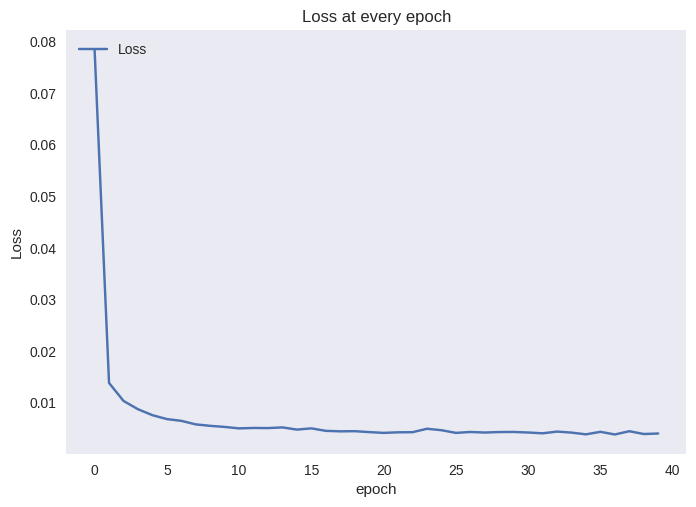

This is Plot of ** Loss vs Iteration ** for the  LSTM


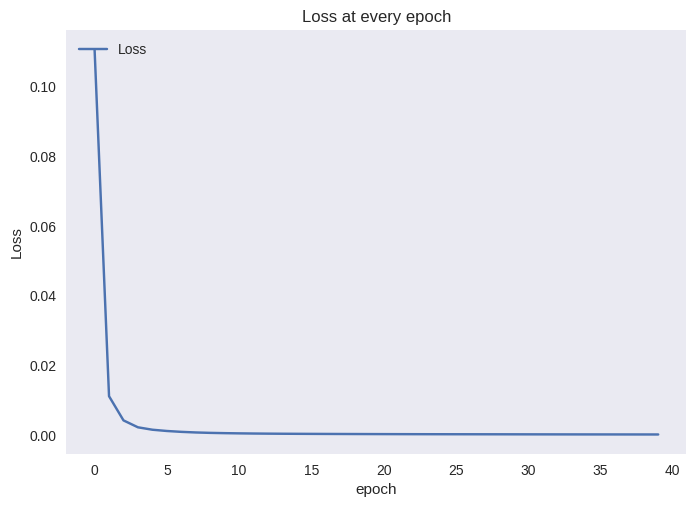

This is Plot of ** Loss vs Iteration ** for the  GRU


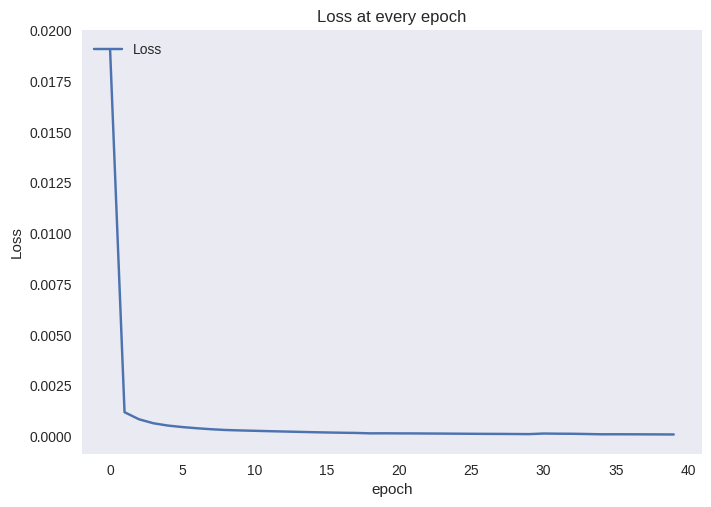

In [27]:
# creating dictionaries to save data to plot later
Dist_of_train_loss_ernn= {}
Dist_of_train_loss_lstm = {}
Dist_of_train_loss_gru = {}

Dist_of_train_loss_ernn = Train(MAX_EPOCH,Model1,Dist_of_train_loss_ernn)
Dist_of_train_loss_lstm = Train(MAX_EPOCH,Model2,Dist_of_train_loss_lstm)
Dist_of_train_loss_gru = Train(MAX_EPOCH,Model3,Dist_of_train_loss_gru)

# Plotting Loss over Training.
def PlotLossGraph(X,model_val):
  print("This is Plot of ** Loss vs Iteration ** for the ",model_val)
  axisx = range(len(X.keys()))
  axisy = [0] * (len(X.keys()))
  plt.plot(X.keys(),X.values(), label='Loss')
  plt.title('Loss at every epoch')
  plt.xlabel('epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper left')
  plt.grid()
  plt.show()

PlotLossGraph(Dist_of_train_loss_ernn,"ERNN")
PlotLossGraph(Dist_of_train_loss_lstm,"LSTM")
PlotLossGraph(Dist_of_train_loss_gru,"GRU")

# `Calculating Accuracy  i have taken +-0.02 as perameter to determine correct prediction because of regrssion`

In [28]:
# Since this is regression problem i have taken +-0.02 as perameter to determine correct prediction
torch.manual_seed(8999)

def Print_Accuracy(Model):
  Total_pred = 0
  Correct_pred = 0
  for X_, Y_ in zip(X_test,y_test):

    HID, OUT =  torch.zeros(1, Hidden_S, requires_grad=False,dtype=torch.float64), 0
    CELL =  torch.zeros(1, Hidden_S, requires_grad=False,dtype=torch.float64)

    for i in range(X_.shape[0]):
      if Model!=Model2:
        OUT, HID = Model(X_[i,:], HID)
      else:
        OUT, HID, CELL = Model(X_[i,:], HID,CELL)

    if abs(OUT.item()-Y_.item()) <0.02:
      Correct_pred+=1
    Total_pred+=1

  Acc = Correct_pred/Total_pred
  print("==>  %2.4f"%Acc )

print("Accuracy for the model 1 is : ")
Print_Accuracy(Model1)

print("Accuracy for the model 2 is : ")
Print_Accuracy(Model2)

print("Accuracy for the model 3 is : ")
Print_Accuracy(Model3)

Accuracy for the model 1 is : 
==>  0.2951
Accuracy for the model 2 is : 
==>  0.9767
Accuracy for the model 3 is : 
==>  0.9887


# `Calculating Baseline and Ploting all algo loss vs epoch line1`

100%|██████████| 40/40 [00:11<00:00,  3.59it/s]




Plot of Loss vs Iteration for ALL algo with baseline


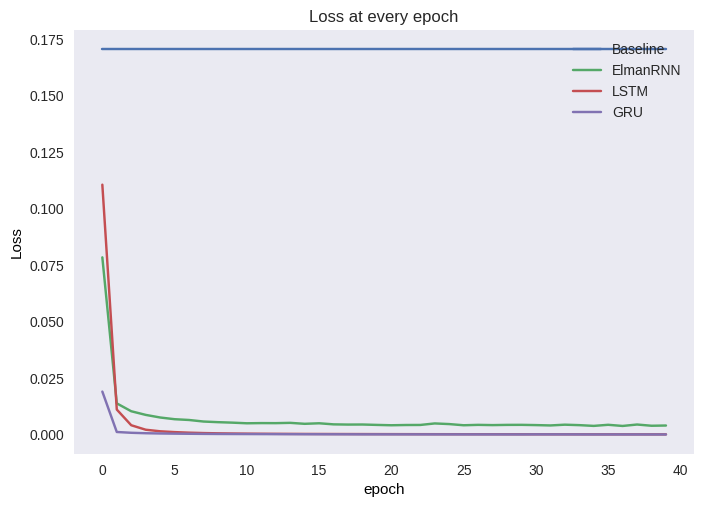

In [29]:
# Calculating Baseline
Dict_of_Train_Loss_Baseline = {}
MSE_LOSS =  nn.MSELoss()
for epoch in tqdm(range(MAX_EPOCH)):
  List_epoch_baseline = list()
  for X_, Y_ in zip(X_train,y_train):
    lossB = MSE_LOSS(torch.tensor(1), torch.from_numpy(np.array([Y_])))
    List_epoch_baseline.append(lossB.detach().item())
  Dict_of_Train_Loss_Baseline[epoch] = torch.tensor(List_epoch_baseline).mean()
print("\n")
print("Plot of Loss vs Iteration for ALL algo with baseline")
axisx = range(len(Dist_of_train_loss_lstm.keys()))
axisy = [0] * (len(Dist_of_train_loss_lstm.keys()))
plt.plot(Dict_of_Train_Loss_Baseline.keys(),Dict_of_Train_Loss_Baseline.values(), label='Baseline')
plt.plot(Dist_of_train_loss_ernn.keys(),Dist_of_train_loss_ernn.values(),  label='ElmanRNN')
plt.plot(Dist_of_train_loss_lstm.keys(),Dist_of_train_loss_lstm.values(), label='LSTM')
plt.plot(Dist_of_train_loss_gru.keys(),Dist_of_train_loss_gru.values(), label='GRU')
plt.title('Loss at every epoch')
plt.xlabel('epoch', color='#000000')
plt.ylabel('Loss', color='#000000')
plt.legend(loc='upper right')
plt.grid()
plt.show()

---
* Note: Please do Run All cells
---

<center><h1> Thank You!

# End
